In [192]:
%matplotlib inline

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Working with Text

### Read .txt file with text:

In [13]:
with open("alice.txt", "rb") as file: # read binary
    print(file.read()[:500])

b"\r\n\r\n\r\nProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Alice's Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: June 25, 2008 [EBook #11]\r\nLast Updated: October 6, 2016\r\n\r\nLanguage: English\r\n\r\n"


In [68]:
with open("alice.txt", "r", encoding = "utf-8") as file:
    alice_text = file.read()

print(len(alice_text))
print(alice_text[:500])

164108



Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encodi


### Read .csv file with text:

In [37]:
twitter_data = pd.read_csv("twitter_data/twitter_training.csv", header = None)

In [38]:
twitter_data.columns = ["tweet_id", "entity", "sentiment", "content"]

In [39]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [42]:
twitter_data

tweet_id       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                                 content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

Content column:

In [43]:
twitter_data.content.str.len().sort_values(ascending = False) # from longest content to shortest content

70940    957.0
28994    727.0
3098     692.0
18128    692.0
36308    692.0
         ...  
73972      NaN
73973      NaN
74421      NaN
74422      NaN
74423      NaN
Name: content, Length: 74682, dtype: float64

In [44]:
twitter_data.loc[70940, "content"] # get record with content value = 70940

'The event dedicated to Victory Day in the Great Patriotic War was held as part of the celebration of the 70th anniversary of Victory in the Great Patriotic War of 1941-1945, which was attended by veterans of the Great Patriotic War, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home'

In [45]:
twitter_data[twitter_data.content.isna()] # get NaN content values

tweet_id       entity sentiment content
61         2411  Borderlands   Neutral     NaN
553        2496  Borderlands   Neutral     NaN
589        2503  Borderlands   Neutral     NaN
745        2532  Borderlands  Positive     NaN
1105       2595  Borderlands  Positive     NaN
...         ...          ...       ...     ...
73972      9073       Nvidia  Positive     NaN
73973      9073       Nvidia  Positive     NaN
74421      9154       Nvidia  Positive     NaN
74422      9154       Nvidia  Positive     NaN
74423      9154       Nvidia  Positive     NaN

[686 rows x 4 columns]

In [46]:
twitter_data = twitter_data.dropna(subset = ["content"]) # drop NaN content values

In [49]:
twitter_data.content.str.len().sort_values(ascending = False) 

70940    957
28994    727
3098     692
18128    692
36308    692
        ... 
39666      1
51983      1
55494      1
29339      1
69402      1
Name: content, Length: 73996, dtype: int64

In [53]:
twitter_data[twitter_data.content.str.len() <= 3] # get content values <= 3 symbols

tweet_id       entity   sentiment content
11         2402  Borderlands    Positive     was
53         2409  Borderlands     Neutral     all
191        2432  Borderlands    Positive     why
203        2434  Borderlands    Negative       I
389        2465  Borderlands  Irrelevant      is
...         ...          ...         ...     ...
74393      9148       Nvidia     Neutral     the
74411      9151       Nvidia    Positive      to
74418      9154       Nvidia    Positive        
74507      9171       Nvidia     Neutral     You
74591      9185       Nvidia     Neutral     you

[1410 rows x 4 columns]

In [54]:
twitter_data.content.str.len().mean() # mean len of content

108.78365046759285

In [58]:
twitter_data.content.str.len().median() # median len of content

91.0

Sentiment column:

In [59]:
twitter_data.sentiment

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: sentiment, Length: 73996, dtype: object

In [64]:
# groups the rows with the same sentiment value together 
for sentiment, group_data in twitter_data.groupby("sentiment"):  
    # print sentiment value and the median len of the content for current sentiment group
    print(sentiment, group_data.content.str.len().median())

Irrelevant 93.0
Negative 91.0
Neutral 105.0
Positive 74.0


### Symbol analysis

In [72]:
Counter(twitter_data.loc[0].content) # get symbols and their count from content value from first record

Counter({' ': 10,
         'l': 5,
         'i': 4,
         'n': 4,
         'r': 4,
         'd': 4,
         'e': 3,
         'o': 3,
         'a': 3,
         'm': 2,
         'g': 2,
         't': 2,
         'u': 2,
         'b': 1,
         's': 1,
         'w': 1,
         'y': 1,
         ',': 1})

In [76]:
# to get every symbol I must get all texts together in one array
# converts the "content" series from the df into a np array, join them
all_contents_string = " ".join(twitter_data.content.ravel()) # big string

In [78]:
Counter(all_contents_string) # etoan isrldh - the most used symbols in English

Counter({' ': 1435996,
         'e': 645445,
         't': 495077,
         'o': 473359,
         'a': 459770,
         'n': 382395,
         'i': 378497,
         's': 352664,
         'r': 307248,
         'l': 250954,
         'h': 245582,
         'd': 200985,
         '.': 181075,
         'u': 167637,
         'm': 166695,
         'c': 165828,
         'y': 142591,
         'g': 141430,
         'p': 121339,
         'f': 112150,
         'w': 109137,
         'b': 92905,
         'k': 70703,
         'v': 66659,
         'I': 56573,
         'T': 41011,
         'A': 40142,
         'S': 36064,
         '/': 34279,
         ',': 32037,
         '!': 29426,
         '@': 28914,
         'E': 27906,
         'R': 27027,
         'O': 26915,
         'C': 24388,
         'G': 24136,
         'N': 23321,
         '2': 22155,
         'M': 21996,
         'D': 21916,
         "'": 21852,
         'B': 21473,
         '0': 21412,
         'P': 21144,
         'F': 20629,
         'L'

About this data there is no matter what are symbols - upper or lower case, so i make all lower case:

In [82]:
symbols_frequiencies = Counter(all_contents_string.lower()).most_common(20)

In [83]:
symbols_frequiencies

[(' ', 1435996),
 ('e', 673351),
 ('t', 536088),
 ('o', 500274),
 ('a', 499912),
 ('i', 435070),
 ('n', 405716),
 ('s', 388728),
 ('r', 334275),
 ('l', 270617),
 ('h', 264166),
 ('d', 222901),
 ('c', 190216),
 ('m', 188691),
 ('.', 181075),
 ('u', 181008),
 ('g', 165566),
 ('y', 153245),
 ('p', 142483),
 ('f', 132779)]

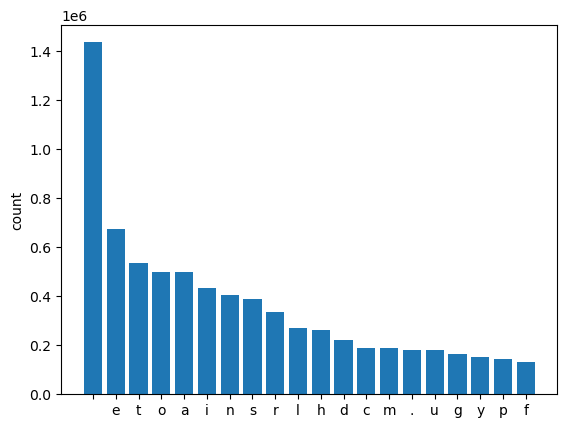

In [87]:
plt.bar([symbol for symbol, frequency in symbols_frequiencies], [frequency for symbol, frequency in symbols_frequiencies])
plt.ylabel("count")
plt.show()

### Words analysis

In [89]:
all_words = all_contents_string.split(" ") # get only words without empty spaces

In [97]:
Counter(all_words) # count of all words

Counter({'the': 38242,
         'to': 27711,
         'I': 25184,
         'and': 24646,
         'a': 21849,
         'of': 18621,
         'is': 16472,
         'for': 14708,
         '/': 14655,
         'in': 14081,
         '': 13526,
         '@': 11081,
         'on': 11068,
         'this': 10534,
         '.': 10193,
         'my': 10120,
         'it': 9649,
         'you': 9466,
         'that': 9023,
         'with': 8286,
         'have': 6250,
         'so': 5993,
         'be': 5721,
         'game': 5696,
         'just': 5679,
         'are': 5526,
         'but': 5524,
         'not': 5382,
         'me': 5360,
         'was': 5138,
         'The': 5005,
         'at': 4699,
         '-': 4650,
         'all': 4561,
         'like': 4318,
         'from': 4067,
         'your': 3786,
         'out': 3747,
         'i': 3731,
         'get': 3517,
         'has': 3514,
         'as': 3410,
         'about': 3292,
         '2': 3097,
         'an': 3050,
         '&': 3

In [99]:
# download stopwords for many languages
# nltk.download("stopwords")

In [105]:
stopwords.words("english") # return stopwords in english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [119]:
twitter_data[twitter_data.content.str.contains("happy", case = False)] # case insensitive

tweet_id       entity   sentiment  \
233        2439  Borderlands    Positive   
384        2465  Borderlands  Irrelevant   
385        2465  Borderlands  Irrelevant   
386        2465  Borderlands  Irrelevant   
387        2465  Borderlands  Irrelevant   
...         ...          ...         ...   
73192      8938       Nvidia    Negative   
73193      8938       Nvidia    Negative   
73405      8974       Nvidia    Positive   
74109      9097       Nvidia     Neutral   
74441      9157       Nvidia    Positive   

                                                 content  \
233    I got to play Jackson 2 with his entire polycu...   
384    Pretty Happy with this! I made these sub badge...   
385    Pretty happy with it! I made these sub-badges ...   
386    Pretty Happy with this! I made these subbids f...   
387    Pretty Happy with this! I made these sub badge...   
...                                                  ...   
73192  So that some GeForce Networks RTX 3080 pics le...   
73193  So first GeForce RTX 3080 pics leaked, that so...   
73405  Fucking W, I was happy when the new graphics c...   
74109  Nvidia RTX 3080 cards are selling @ thousands ...   
74441  audiences are very happy they have completed N...   

                                                   words  
233    [I, got, to, play, Jackson, 2, with, his, enti...  
384    [Pretty, Happy, with, this!, I, made, these, s...  
385    [Pretty, happy, with, it!, I, made, these, sub...  
386    [Pretty, Happy, with, this!, I, made, these, s...  
387    [Pretty, Happy, with, this!, I, made, these, s...  
...                                                  ...  
73192  [So, that, some, GeForce, Networks, RTX, 3080,...  
73193  [So, first, GeForce, RTX, 3080, pics, leaked,,...  
73405  [Fucking, W,, I, was, happy, when, the, new, g...  
74109  [Nvidia, RTX, 3080, cards, are, selling, @, th...  
74441  [audiences, are, very, happy, they, have, comp...  

[1185 rows x 5 columns]

In [129]:
# type accessor:
twitter_data[twitter_data.content.str.contains("happy")]

tweet_id       entity   sentiment  \
233        2439  Borderlands    Positive   
385        2465  Borderlands  Irrelevant   
394        2466  Borderlands    Positive   
570        2499  Borderlands     Neutral   
571        2499  Borderlands     Neutral   
...         ...          ...         ...   
73192      8938       Nvidia    Negative   
73193      8938       Nvidia    Negative   
73405      8974       Nvidia    Positive   
74109      9097       Nvidia     Neutral   
74441      9157       Nvidia    Positive   

                                                 content  \
233    I got to play Jackson 2 with his entire polycu...   
385    Pretty happy with it! I made these sub-badges ...   
394    Now I am happy here... With Samsung that is fu...   
570    i kno borderlands handled zer0 being nonbinary...   
571    i kno borderlands handling zer0 being nonbinar...   
...                                                  ...   
73192  So that some GeForce Networks RTX 3080 pics le...   
73193  So first GeForce RTX 3080 pics leaked, that so...   
73405  Fucking W, I was happy when the new graphics c...   
74109  Nvidia RTX 3080 cards are selling @ thousands ...   
74441  audiences are very happy they have completed N...   

                                                   words  
233    [I, got, to, play, Jackson, 2, with, his, enti...  
385    [Pretty, happy, with, it!, I, made, these, sub...  
394    [Now, I, am, happy, here..., With, Samsung, th...  
570    [i, kno, borderlands, handled, zer0, being, no...  
571    [i, kno, borderlands, handling, zer0, being, n...  
...                                                  ...  
73192  [So, that, some, GeForce, Networks, RTX, 3080,...  
73193  [So, first, GeForce, RTX, 3080, pics, leaked,,...  
73405  [Fucking, W,, I, was, happy, when, the, new, g...  
74109  [Nvidia, RTX, 3080, cards, are, selling, @, th...  
74441  [audiences, are, very, happy, they, have, comp...  

[762 rows x 5 columns]

In [130]:
twitter_data[twitter_data.content.str.contains("happy", case = False)]

tweet_id       entity   sentiment  \
233        2439  Borderlands    Positive   
384        2465  Borderlands  Irrelevant   
385        2465  Borderlands  Irrelevant   
386        2465  Borderlands  Irrelevant   
387        2465  Borderlands  Irrelevant   
...         ...          ...         ...   
73192      8938       Nvidia    Negative   
73193      8938       Nvidia    Negative   
73405      8974       Nvidia    Positive   
74109      9097       Nvidia     Neutral   
74441      9157       Nvidia    Positive   

                                                 content  \
233    I got to play Jackson 2 with his entire polycu...   
384    Pretty Happy with this! I made these sub badge...   
385    Pretty happy with it! I made these sub-badges ...   
386    Pretty Happy with this! I made these subbids f...   
387    Pretty Happy with this! I made these sub badge...   
...                                                  ...   
73192  So that some GeForce Networks RTX 3080 pics le...   
73193  So first GeForce RTX 3080 pics leaked, that so...   
73405  Fucking W, I was happy when the new graphics c...   
74109  Nvidia RTX 3080 cards are selling @ thousands ...   
74441  audiences are very happy they have completed N...   

                                                   words  
233    [I, got, to, play, Jackson, 2, with, his, enti...  
384    [Pretty, Happy, with, this!, I, made, these, s...  
385    [Pretty, happy, with, it!, I, made, these, sub...  
386    [Pretty, Happy, with, this!, I, made, these, s...  
387    [Pretty, Happy, with, this!, I, made, these, s...  
...                                                  ...  
73192  [So, that, some, GeForce, Networks, RTX, 3080,...  
73193  [So, first, GeForce, RTX, 3080, pics, leaked,,...  
73405  [Fucking, W,, I, was, happy, when, the, new, g...  
74109  [Nvidia, RTX, 3080, cards, are, selling, @, th...  
74441  [audiences, are, very, happy, they, have, comp...  

[1185 rows x 5 columns]

In [131]:
# what is the sentiment of the texts containing word 'happy':
twitter_data[twitter_data.content.str.contains("happy", case = False)].sentiment.value_counts()

sentiment
Positive      531
Neutral       281
Irrelevant    252
Negative      121
Name: count, dtype: int64

In [133]:
# all records which content contains 'happy' and sentiment is Negative
twitter_data[
    (twitter_data.content.str.contains("happy", case = False)) & (twitter_data.sentiment == "Negative")
]

tweet_id                     entity sentiment  \
2128       2772                Borderlands  Negative   
2304       1604  CallOfDutyBlackopsColdWar  Negative   
2305       1604  CallOfDutyBlackopsColdWar  Negative   
2306       1604  CallOfDutyBlackopsColdWar  Negative   
2307       1604  CallOfDutyBlackopsColdWar  Negative   
...         ...                        ...       ...   
73189      8938                     Nvidia  Negative   
73190      8938                     Nvidia  Negative   
73191      8938                     Nvidia  Negative   
73192      8938                     Nvidia  Negative   
73193      8938                     Nvidia  Negative   

                                                 content  \
2128   Saw ran an ad for the new borderlands dlc s st...   
2304                              SO HAPPY ABOUT THIS .    
2305                                  SO HAPPY FOR THAT.   
2306                                So HAPPY ABOUT THIS.   
2307                         SO HAPPY ABOUT THIS RELEASE   
...                                                  ...   
73189  So some pictures of the GeForce RTX 3080 have ...   
73190  So some photos of the GeForce X 3080 have leak...   
73191  So the GeForce RTX 3080 pics leaked, and some ...   
73192  So that some GeForce Networks RTX 3080 pics le...   
73193  So first GeForce RTX 3080 pics leaked, that so...   

                                                   words  
2128   [Saw, ran, an, ad, for, the, new, borderlands,...  
2304                       [SO, HAPPY, ABOUT, THIS, ., ]  
2305                             [SO, HAPPY, FOR, THAT.]  
2306                           [So, HAPPY, ABOUT, THIS.]  
2307                   [SO, HAPPY, ABOUT, THIS, RELEASE]  
...                                                  ...  
73189  [So, some, pictures, of, the, GeForce, RTX, 30...  
73190  [So, some, photos, of, the, GeForce, X, 3080, ...  
73191  [So, the, GeForce, RTX, 3080, pics, leaked,, a...  
73192  [So, that, some, GeForce, Networks, RTX, 3080,...  
73193  [So, first, GeForce, RTX, 3080, pics, leaked,,...  

[121 rows x 5 columns]

**TOKENIZATION** - separation of large text into small peaces. One piece - token.

In [107]:
# get every word from each content, split them by one or more spaces
twitter_data.content.str.split("\s+") 

0        [im, getting, on, borderlands, and, i, will, m...
1        [I, am, coming, to, the, borders, and, I, will...
2        [im, getting, on, borderlands, and, i, will, k...
3        [im, coming, on, borderlands, and, i, will, mu...
4        [im, getting, on, borderlands, 2, and, i, will...
                               ...                        
74677    [Just, realized, that, the, Windows, partition...
74678    [Just, realized, that, my, Mac, window, partit...
74679    [Just, realized, the, windows, partition, of, ...
74680    [Just, realized, between, the, windows, partit...
74681    [Just, like, the, windows, partition, of, my, ...
Name: content, Length: 73996, dtype: object

In [114]:
twitter_data["words"] = twitter_data.content.str.split("\s+") 

C:\Users\USER\AppData\Local\Temp\ipykernel_12008\3777293323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data["words"] = twitter_data.content.str.split("\s+")


In [138]:
twitter_data.head()

tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                               words  
0  [im, getting, on, borderlands, and, i, will, m...  
1  [I, am, coming, to, the, borders, and, I, will...  
2  [im, getting, on, borderlands, and, i, will, k...  
3  [im, coming, on, borderlands, and, i, will, mu...  
4  [im, getting, on, borderlands, 2, and, i, will...

In [115]:
twitter_data.words.apply(lambda x: len(x)).sort_values(ascending = False)

1826     198
32186    198
43712    198
10454    198
68624    194
        ... 
16535      1
35418      1
61169      1
69474      1
59351      1
Name: words, Length: 73996, dtype: int64

In [150]:
twitter_data.words[42]

['Check', 'out', 'this', 'epic', 'streamer!.', '']

In [157]:
# remove '.' , '!' , '?' , '':

def clean_chars(words, characters = [".", "?", "!"], replacement = ""):
    words_cleaned = words.copy()
    
    for char in characters:
        words_cleaned = [word.replace(char, replacement) for word in words_cleaned]
        
    words_cleaned = [word for word in words_cleaned if word != ""]
    return words_cleaned

In [158]:
clean_chars(twitter_data.words[42])

['Check', 'out', 'this', 'epic', 'streamer']

In [159]:
twitter_data.words.apply(clean_chars) # clean all dataset

0        [im, getting, on, borderlands, and, i, will, m...
1        [I, am, coming, to, the, borders, and, I, will...
2        [im, getting, on, borderlands, and, i, will, k...
3        [im, coming, on, borderlands, and, i, will, mu...
4        [im, getting, on, borderlands, 2, and, i, will...
                               ...                        
74677    [Just, realized, that, the, Windows, partition...
74678    [Just, realized, that, my, Mac, window, partit...
74679    [Just, realized, the, windows, partition, of, ...
74680    [Just, realized, between, the, windows, partit...
74681    [Just, like, the, windows, partition, of, my, ...
Name: words, Length: 73996, dtype: object

In [161]:
clean_chars(words = "This is @vesi".split(" "), characters = ["@"], replacement = "username: ")

['This', 'is', 'username: vesi']

Special tokens:

In [163]:
# @username -> [MENTION]
# [BOS] -> beginning of the sentnce
# [EOS] -> end of the sentence

Name entity recognition – tags that are used in natural language processing. LLM capture names (per), location (loc), organizations, etc.

In [162]:
# ['Check', 'out'] 
# ['out', 'this']

In [176]:
lower_words = twitter_data.words.sample(20).apply(lambda words: [w.lower() for w in words]) # make every word lowercase

In [177]:
lower_words_no_stopwords = lower_words.apply(lambda words: [w for w in words if not w in stopwords.words("english")])

In [178]:
lower_words_no_stopwords.apply(len)

37288    10
74136    13
30154    10
58802    14
16499     2
22305     8
48377    14
13321     9
3109     14
32634     7
48631    10
17594     3
34901    16
45473     1
7364     12
30172    33
46390     3
7495      7
35219     3
27811     8
Name: words, dtype: int64

In [180]:
lower_words

37288    [14, thank, you, twitter, for, telling, me, ke...
74136    [@nvidia, hey,, i, have, gtx, 950m, and, i, am...
30154    [watch, strapxaxholic, on, twitch!, but, i, th...
58802    [facebook, and, memes, and, videos, made, hipp...
16499                                        [i'm, dying.]
22305    [so, i, played, cs:go, for, his, first, time, ...
48377    [pretty, hard, they, keep, track, w, social, d...
13321    [@, stephencurry30, is, so, funny, to, play, w...
3109     [it's, like, the, universe, doesn't, want, me,...
32634    [league,, but, ranked,, and, also, in, the, mo...
48631    [all, i, know, is, that, if, i, don't, buy, th...
17594              [godfall, was, pretty, interesting....]
34901    [fucking, @fortnitegame.., do, get, that, you,...
45473                                  [this, comes, here]
7364     [i, love, leather,, and, especially, weapons, ...
30172    [r, rhandlerr, hello., i, encounter, some, str...
46390                                   [1, wtf, @verizo

In [179]:
lower_words.apply(len)

37288    16
74136    22
30154    14
58802    30
16499     2
22305    12
48377    21
13321    13
3109     27
32634    11
48631    24
17594     4
34901    29
45473     3
7364     19
30172    42
46390     3
7495     11
35219     5
27811    19
Name: words, dtype: int64

**Stemming** - simple process of extracting the basic form of the word (root) by removing suffixes and prefixes. \
**Lemanization** - complex technique using lexical rules and dictionaries to convert words to their base (lemma) form.\
(connecting, connected, connection – connect).

In [196]:
words_in_line = lower_words_no_stopwords.loc[27811]
words_in_line

['turned',
 'light',
 'room,',
 'post',
 'started',
 'shine',
 'brightly...',
 'mean?']

In [195]:
stemmer = PorterStemmer()

In [197]:
[stemmer.stem(w) for w in words_in_line]

['turn', 'light', 'room,', 'post', 'start', 'shine', 'brightly...', 'mean?']

In [198]:
lower_words_no_stopwords.apply(lambda words: [stemmer.stem(w) for w in words]) 

37288    [14, thank, twitter, tell, kelli, text, nelli,...
74136    [@nvidia, hey,, gtx, 950m, experienc, low, fp,...
30154    [watch, strapxaxhol, twitch!, think, i'm, pret...
58802    [facebook, meme, video, made, hippi, happen, m...
16499                                        [i'm, dying.]
22305    [play, cs:go, first, time, last, night...., i’...
48377    [pretti, hard, keep, track, w, social, distanc...
13321    [@, stephencurry30, funni, play, @, nba2k!!, p...
3109     [like, univers, want, get, shit, together,, wa...
32634    [league,, ranked,, also, morning., twitch.tv/t...
48631    [know, buy, $300, giant, skeleton, home, depot...
17594                    [godfal, pretti, interesting....]
34901    [fuck, @fortnitegame.., get, wont, remov, sbmm...
45473                                               [come]
7364     [love, leather,, especi, weapon, leather., man...
30172    [r, rhandlerr, hello., encount, strang, quest,...
46390                                   [1, wtf, @verizo

In [225]:
count_vectorizer = CountVectorizer(ngram_range = (1, 3), min_df = 5, max_df = 0.98) 
# ngram_range = (1, 3) - 1 or 2 or 3 words 
# min_df = 5 - must be in 5 contents minimum
# max_df =  - must be in contents maximum 

In [226]:
count_vectorizer.fit(twitter_data.content)

CountVectorizer(max_df=0.98, min_df=5, ngram_range=(1, 3))

In [203]:
# count_vectorizer.vocabulary_  ->  dictionary that the model has learned

In [227]:
vectors = count_vectorizer.transform(twitter_data.content)

In [228]:
vectors

<73996x132325 sparse matrix of type '<class 'numpy.int64'>'
	with 2384282 stored elements in Compressed Sparse Row format>

In [229]:
2384282 / (73996 * 132325) * 100

0.024350477040813487

Matrix with 73996 rows (as the contents are) and 132325 columns (tokens) with 2384282 stored elements (tokens) - 0.024%, because most tokens are not found in all contents.

In [213]:
model = MultinomialNB()

In [236]:
model.fit(vectors, twitter_data.sentiment) # this model can works with this type of data (sparse matrix)

MultinomialNB()

In [237]:
tfidf = TfidfVectorizer(ngram_range = (1, 3), min_df = 5, max_df = 0.98)

In [238]:
tfidf.fit(twitter_data.content)

TfidfVectorizer(max_df=0.98, min_df=5, ngram_range=(1, 3))

In [240]:
tfdift_vectors = tfidf.transform(twitter_data.content)

In [ ]:
model.fit(tfdift_vectors, twitter_data.sentiment)

## Quiz

In [242]:
import re
import requests

url = "http://www.gutenberg.org/files/1342/1342-0.txt"
response = requests.get(url)
text = response.text

text = text.lower()
words = re.findall(r"\b\w+\b", text)

pride_count = words.count("pride")
prejudice_count = words.count("prejudice")

print(f"pride: {pride_count} times")
print(f"prejudice: {prejudice_count} times")

pride: 55 times
prejudice: 10 times


In [264]:
nltk.download("stopwords")

decoded_text = response.content.decode("utf-8")
decoded_text = decoded_text.lower()

words = re.findall(r"\b\w+\b", decoded_text)

stop_words = set(stopwords.words("english"))
words_without_stopwords = [word for word in words if word not in stop_words]

titles = {"mr", "miss", "mrs"}
words_without_stopwords_titles = [word for word in words_without_stopwords if not word in titles]

words_without_stopwords_titles_count = Counter(words_without_stopwords_titles)
words_without_stopwords_titles_count.most_common(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('elizabeth', 645),
 ('could', 530),
 ('would', 482),
 ('darcy', 430),
 ('said', 406)]